In [1]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
%matplotlib inline

In [9]:
df = pd.read_csv('./datasets/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# GETTING UNIQUE RECORD

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
for col in df:
    print(f"{col}=> {df[col].unique()}")

PassengerId=> [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 10

In [18]:
df.Age.value_counts()

21.00    17
24.00    17
22.00    16
30.00    15
18.00    13
         ..
0.83      1
22.50     1
26.50     1
40.50     1
60.50     1
Name: Age, Length: 79, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

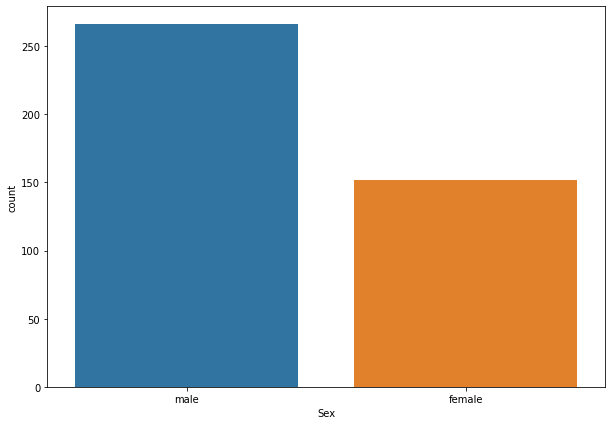

In [19]:
plt.figure(figsize=(10,7))
sn.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

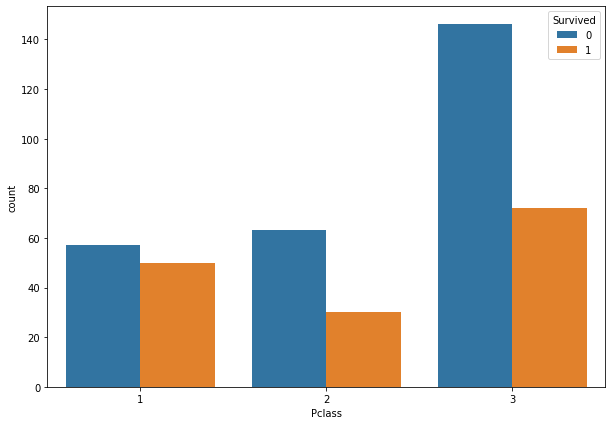

In [25]:
plt.figure(figsize=(10,7))
sn.countplot(x='Pclass',hue ='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

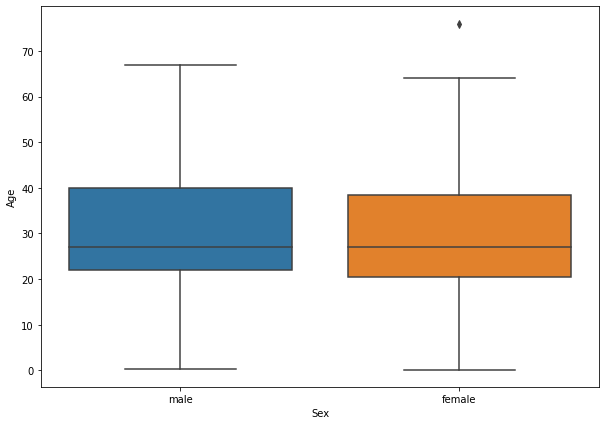

In [26]:
plt.figure(figsize=(10,7))
sn.boxplot(x='Sex',y ='Age',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

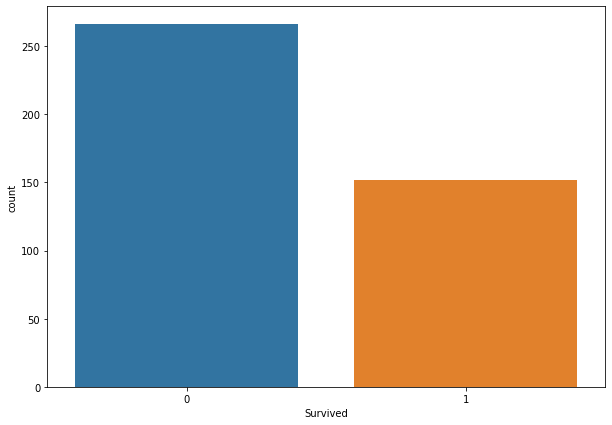

In [31]:
plt.figure(figsize=(10,7))
sn.countplot(x ='Survived',data=df)

In [38]:
df.drop(columns=['Ticket','Fare','Name'],inplace=True)

In [40]:
dfy = df.Survived

In [41]:
dfy.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [113]:
dfx = df.drop(columns = ['Survived'])

In [84]:
dfx.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [114]:
dfx.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [115]:
sex_encoded = pd.get_dummies(dfx.Sex,drop_first = True)

In [116]:
sex_encoded

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [117]:
dfx.Sex = sex_encoded["male"]

In [118]:
dfx.Sex

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: uint8

In [119]:
dfx.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,Q
1,3,0,47.0,1,0,S
2,2,1,62.0,0,0,Q
3,3,1,27.0,0,0,S
4,3,0,22.0,1,1,S


In [120]:
dfx.drop(columns=["Embarked"],inplace = True)

In [121]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    uint8  
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
dtypes: float64(1), int64(3), uint8(1)
memory usage: 13.6 KB


In [122]:
dfx

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
413,3,1,NaN,0,0
414,1,0,39.0,0,0
415,3,1,38.5,0,0
416,3,1,NaN,0,0


In [104]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  0 non-null      int64  
 1   Sex     0 non-null      uint8  
 2   Age     0 non-null      float64
 3   SibSp   0 non-null      int64  
 4   Parch   0 non-null      int64  
dtypes: float64(1), int64(3), uint8(1)
memory usage: 0.0 bytes


In [125]:
dfx

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
413,3,1,NaN,0,0
414,1,0,39.0,0,0
415,3,1,38.5,0,0
416,3,1,NaN,0,0


In [126]:
dfx.dropna(inplace = True)

In [129]:
dfx.reset_index(drop=True)

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
327,3,0,3.0,1,1
328,1,0,37.0,1,0
329,3,0,28.0,0,0
330,1,0,39.0,0,0
